In [27]:
# Import libraries
import pandas as pd
import numpy as np
import math
import seaborn as sns
import shapefile as shp
import matplotlib.pyplot as plt

from IPython.display import Image
import folium
from folium import plugins
from folium.plugins import HeatMap

In [2]:
#Load the datafile
df = pd.read_csv('Fire.csv')

C:\Users\ninas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (19,20,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Inserting datetime attribute
format = '%m/%d/%Y %I:%M:%S %p'
df['Datetime'] = pd.to_datetime(df['Received DtTm'], format=format)
df = df.set_index(pd.DatetimeIndex(df['Datetime']))

In [4]:
# Define focus calls
focuscalls = ['Medical Incident', 'Structure Fire', 'Alarms', 'Traffic Collision', 
              'Citizen Assist / Service Call', 'Outside Fire', 'Water Rescue', 'Vehicle Fire', 
              'Gas Leak (Natural and LP Gases)', 'Electrical Hazard', 'Elevator / Escalator Rescue', 
              'Odor (Strange / Unknown)', 'Smoke Investigation (Outside)', 'Other']

In [5]:
# Define neighborhoods
neighborhoods = df['Neighborhooods - Analysis Boundaries'].unique()
neighborhoods = neighborhoods[0:-1]

In [8]:
# Define districts
districts = ['Central', 'Southern', 'Bayview', 'Mission', 'Park', 'Richmond', 'Ingleside', 'Taraval',
            'Northern', 'Tenderloin']

In [9]:
# Filter the data set and drop nan's and unnecessary columns 
df = df[df['Call Type'].isin(focuscalls)]
df.dropna(how='any')
df = df[df['Neighborhooods - Analysis Boundaries'].isin(neighborhoods)]
df.dropna(how='any')

cols = ['Call Number', 'Call Type', 'Final Priority', 'Neighborhooods - Analysis Boundaries',  
        'Location', 'Datetime', 'Supervisor Districts' ]
df_fil = df[cols]
df_fil['year'] = df_fil.index.year
df_fil = df_fil[(df_fil['year'] >= 2001) & (df_fil['year'] <= 2019)]

C:\Users\ninas\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


# Basic stats for temporal patterns

In [12]:
# Create column in dataframe with month
df_fil['Month'] = df_fil.index.month 
# Create column in dataframe with day
df_fil['Date'] = df_fil.index.date

In [20]:
table_year = df_fil['year'].value_counts()
print('Minimum number of calls per year:',f'{table_year.min():9.0f}')
print('Maximum number of calls per year:',f'{table_year.max():9.0f}' )
print('Average number of calls per year:',f'{table_year.mean():9.0f}')

Minimum number of calls per year:    217798
Maximum number of calls per year:    318431
Average number of calls per year:    261539


In [18]:
#Grouping data by month
month_group = df_fil.groupby([df_fil.index.year, df_fil.index.month])
n = list(month_group.groups.keys())
tot = len(n)
#Setting max og min as the call number of the first observation month
month_max = len(month_group.get_group(n[0]))
month_min = len(month_group.get_group(n[0]))
#Finding max and min of the monthss
for g in month_group.groups:
    tmp = len(month_group.get_group(g))
    if tmp >= month_max:
        month_max = tmp
    if tmp <= month_min:
        month_min = tmp

#Finding average of months
month_ave = len(df_fil)/len(n)

print('Minimum number of calls per month:',  f'{month_min:9.0f}')
print('Maximum number of calls per month:',  f'{month_max:9.0f}')
print('Average number of calls per month:', f'{month_ave:9.0f}')

Minimum number of calls per month:     16640
Maximum number of calls per month:     29053
Average number of calls per month:     21795


In [19]:
table_day = df_fil['Date'].value_counts()
print('Minimum number of calls per day:', f'{table_day.min():9.0f}')
print('Maximum number of calls per day:', f'{table_day.max():9.0f}')
print('Average number of calls per day:',f'{table_day.mean():9.0f}')

Minimum number of calls per day:       387
Maximum number of calls per day:      1737
Average number of calls per day:       716


# Map of San Francisco with random calls

In [28]:
# Plot of random calls from the Fire department data

location = df_fil.sample(10000) 
location['coordinate'] = location.Location.apply(lambda x: eval(x))
# Define latitude and longitude for San Francisco
lat = 37.773972
lon = -122.431297

SF = folium.Map([lat, lon], tiles = "Stamen Toner", zoom_start=13)
# Plot the locations of 10000 incidents as dots
for i in range(len(location)):
     folium.CircleMarker(location.coordinate.iloc[i],radius = 1,color='red',).add_to(SF)

# Display the map
SF

# Histograms for temporal patterns

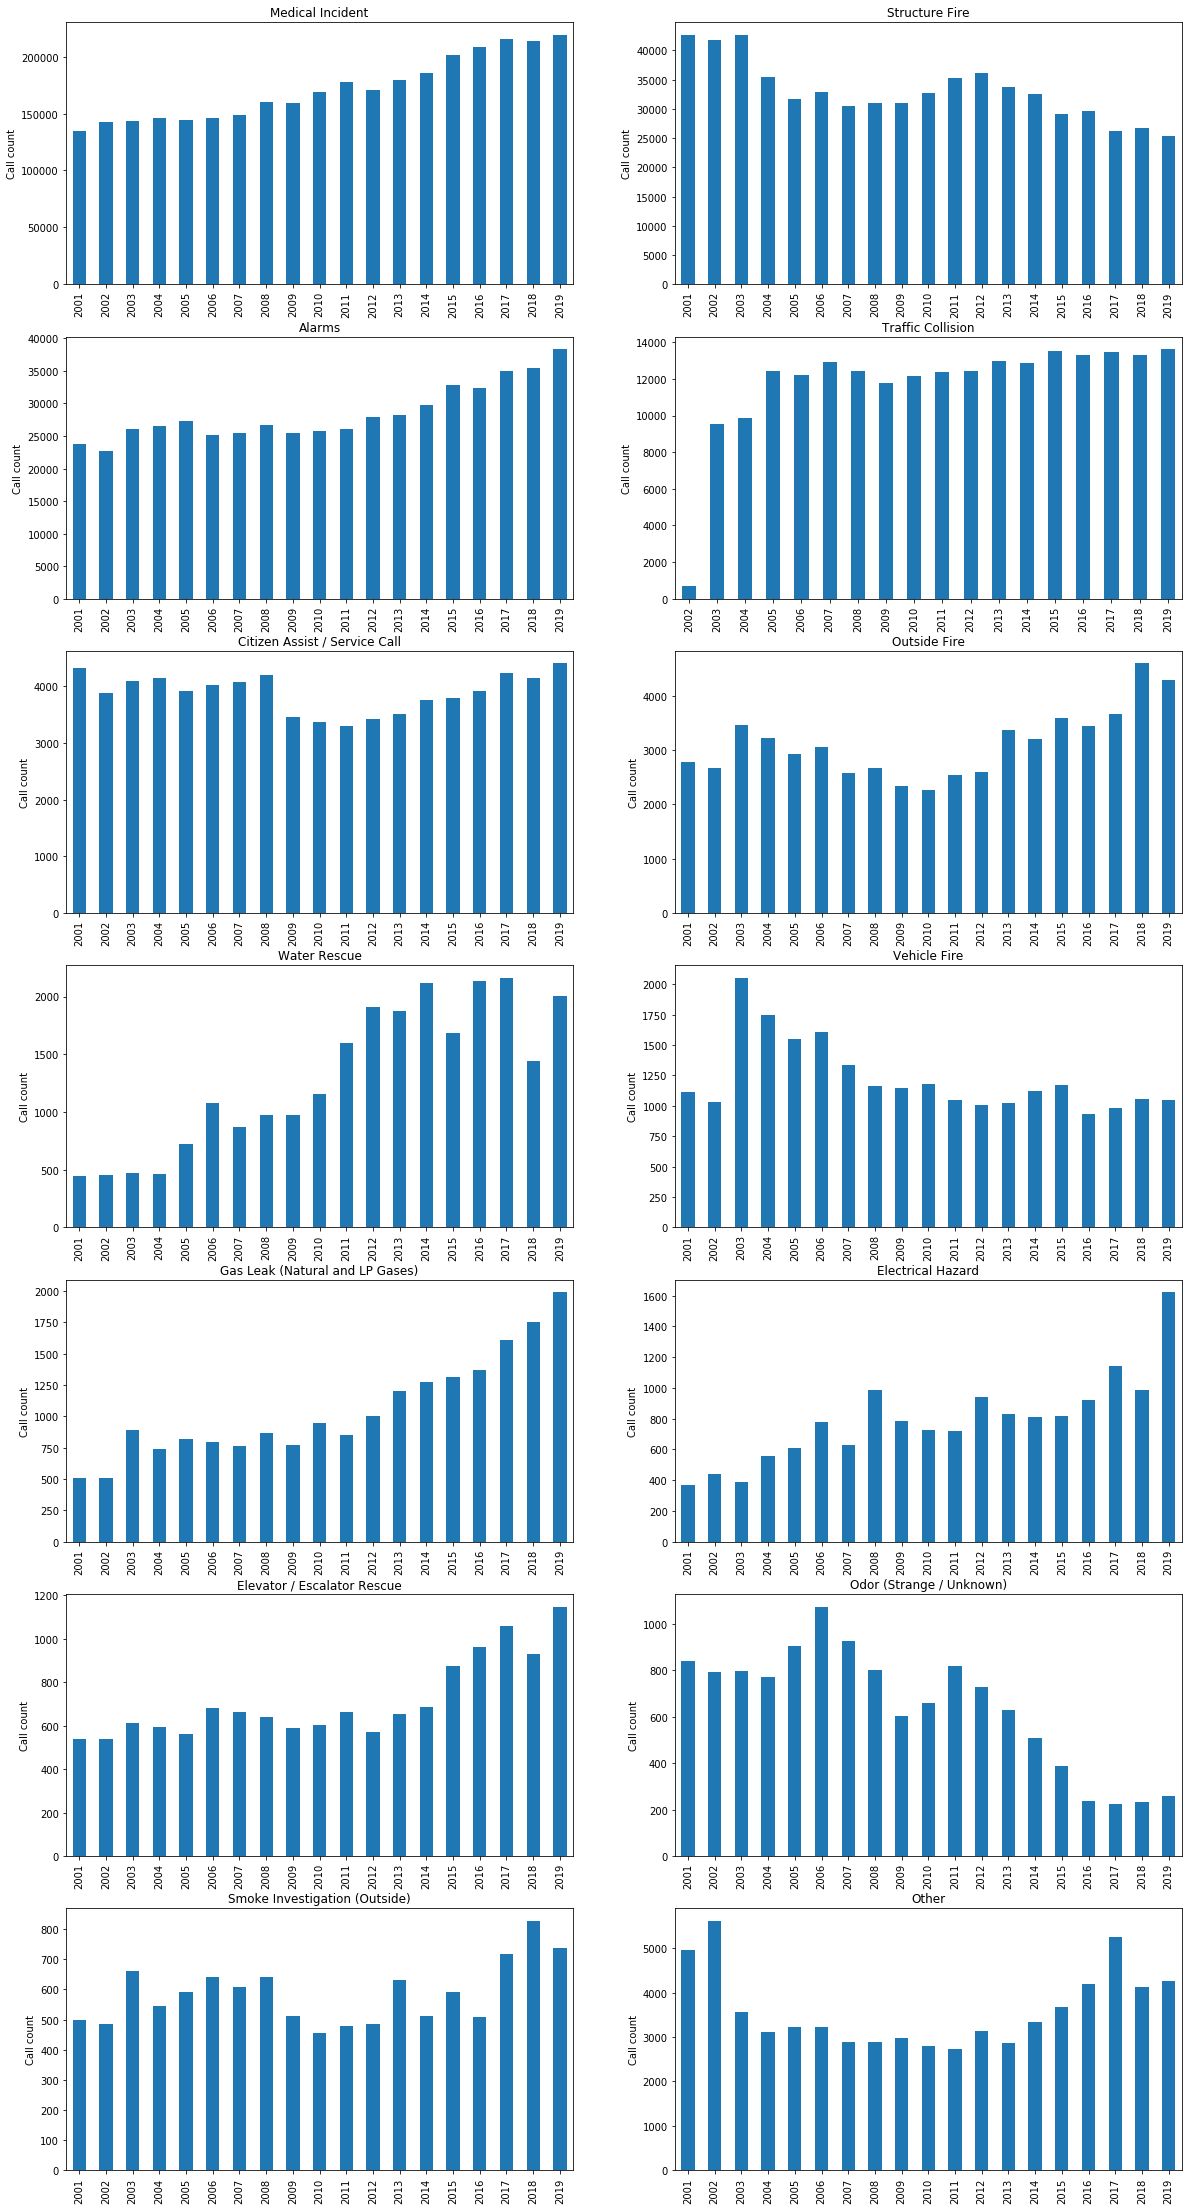

In [29]:
# Yearly patterns
plt.figure(figsize=(20,80))
locs, labels = plt.xticks()

# Make a plot for each focus-crime
for i in range(len(focuscalls)):
    plt.subplot(len(focuscalls),2,i+1)
    tmp = df_fil[df_fil["Call Type"] == focuscalls[i]]
    tmp = tmp.groupby([tmp.index.year]).size()
    tmp.plot(kind = 'bar')
    plt.title(focuscalls[i])
    plt.xlabel('')
    plt.ylabel('Call count')

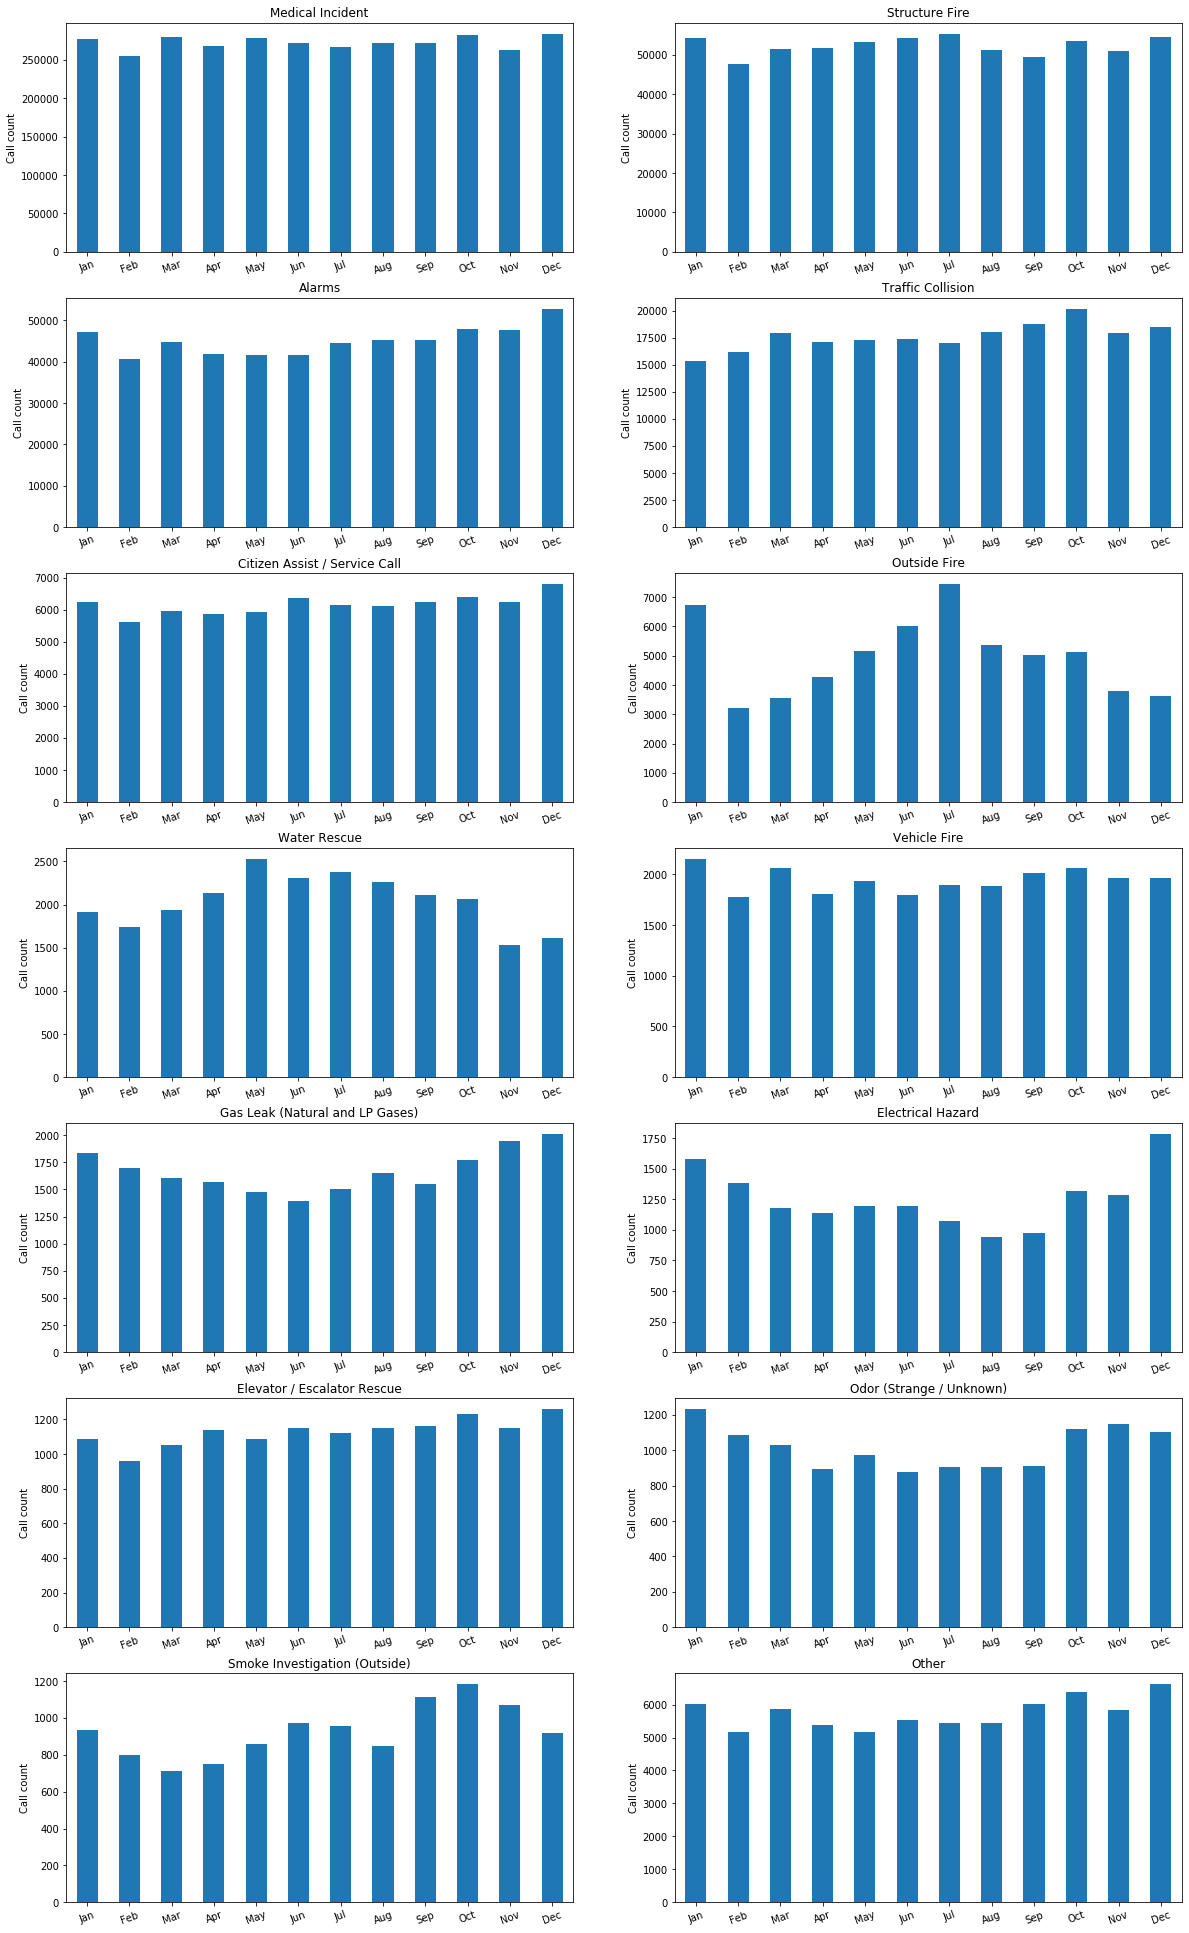

In [30]:
# Monthly patterns
plt.figure(figsize=(20,70))
locs, labels = plt.xticks()

# Make a plot for each focus-crime
for i in range(len(focuscalls)):
    plt.subplot(len(focuscalls),2,i+1)
    tmp = df_fil[df_fil["Call Type"] == focuscalls[i]]
    tmp = tmp.groupby([tmp.index.month]).size()
    tmp.plot(kind = 'bar')
    plt.title(focuscalls[i])
    plt.xlabel('')
    plt.ylabel('Call count')
    plt.xticks(np.arange(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'), rotation=20)

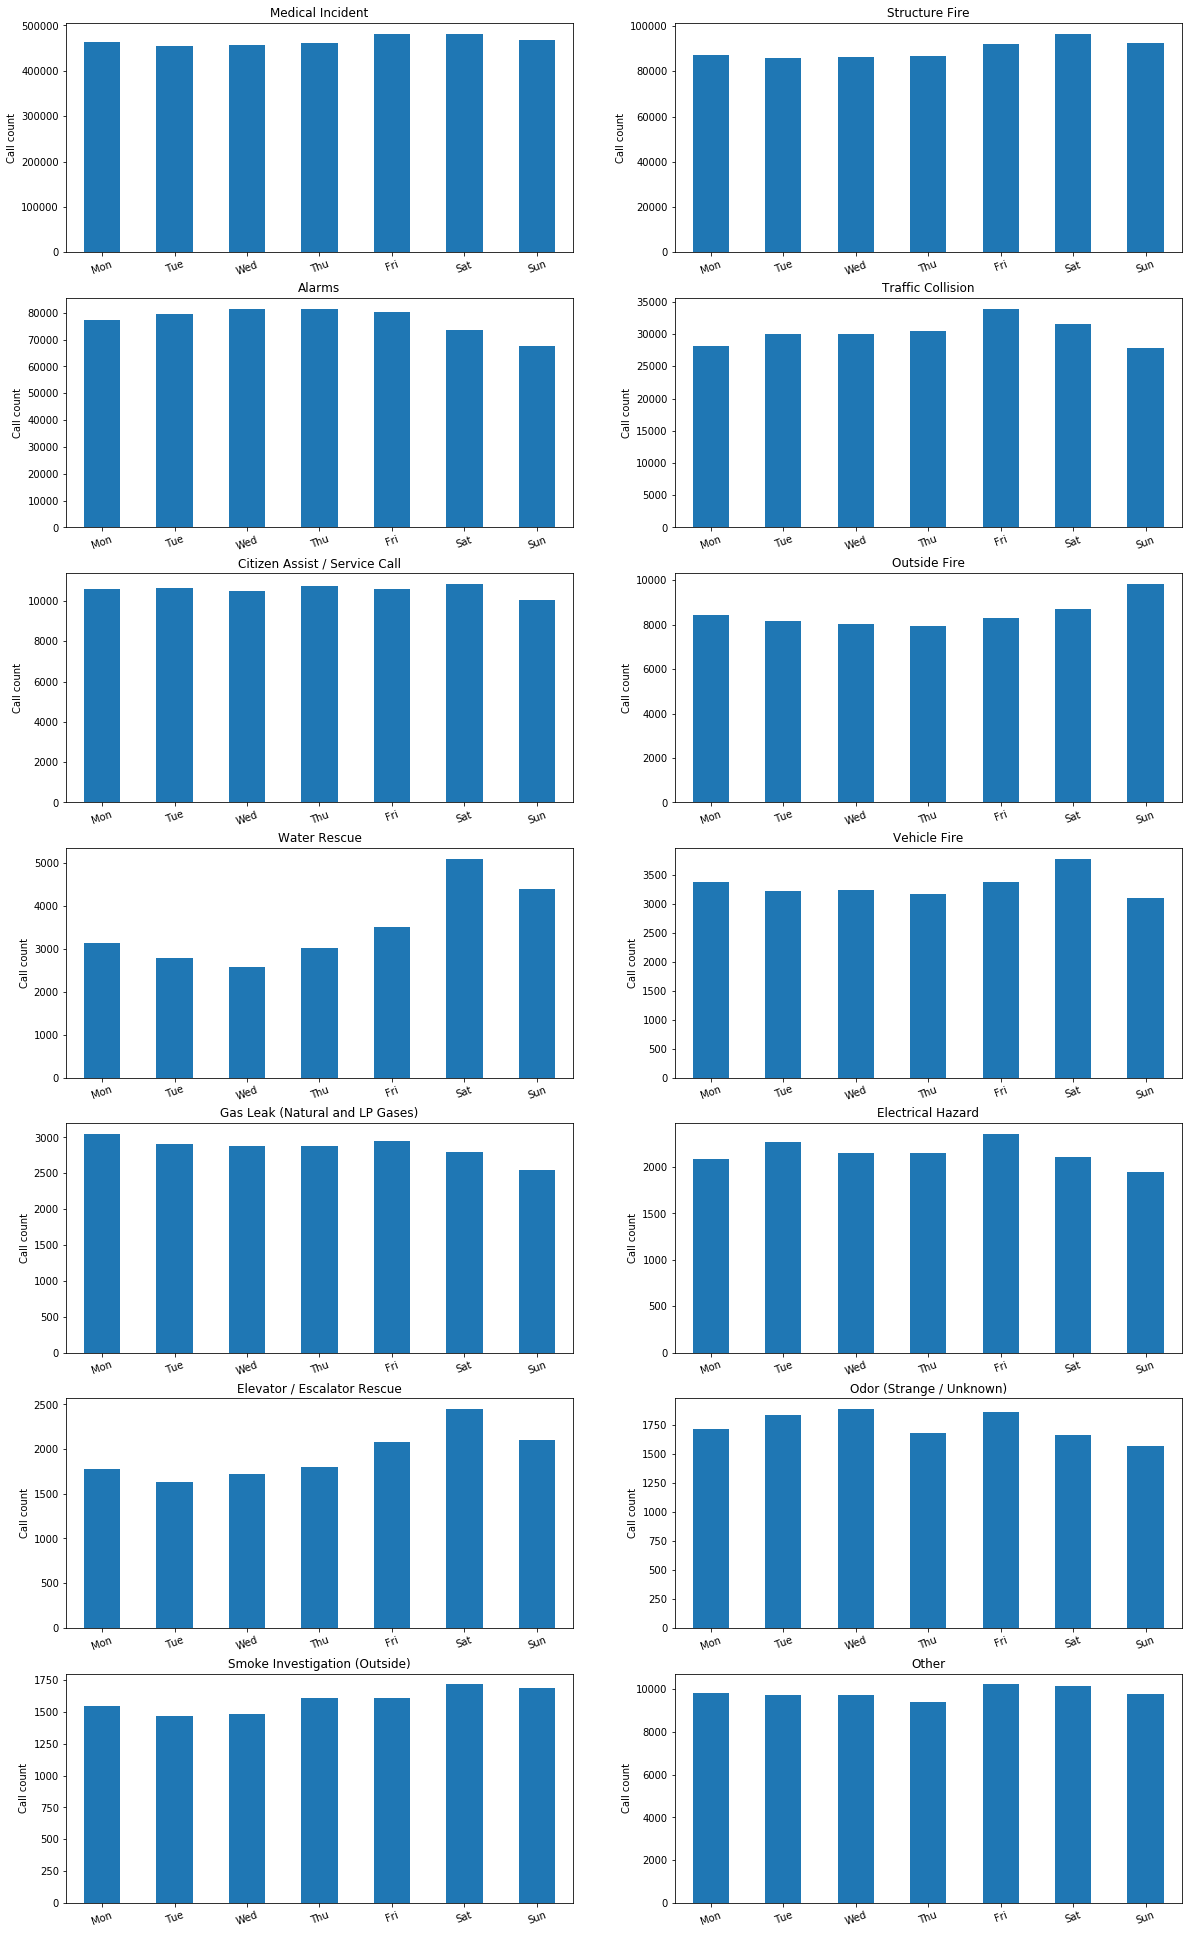

In [21]:
# Weekly patterns
plt.figure(figsize=(20,70))
locs, labels = plt.xticks()

# Make a plot for each focus-crime
for i in range(len(focuscalls)):
    plt.subplot(len(focuscalls),2,i+1)
    tmp = df_fil[df_fil["Call Type"] == focuscalls[i]]
    tmp = tmp.groupby([tmp.index.weekday]).size()
    tmp.plot(kind = 'bar')
    plt.title(focuscalls[i])
    plt.xlabel('')
    plt.ylabel('Call count')
    plt.xticks(np.arange(7), ('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'), rotation = 20)

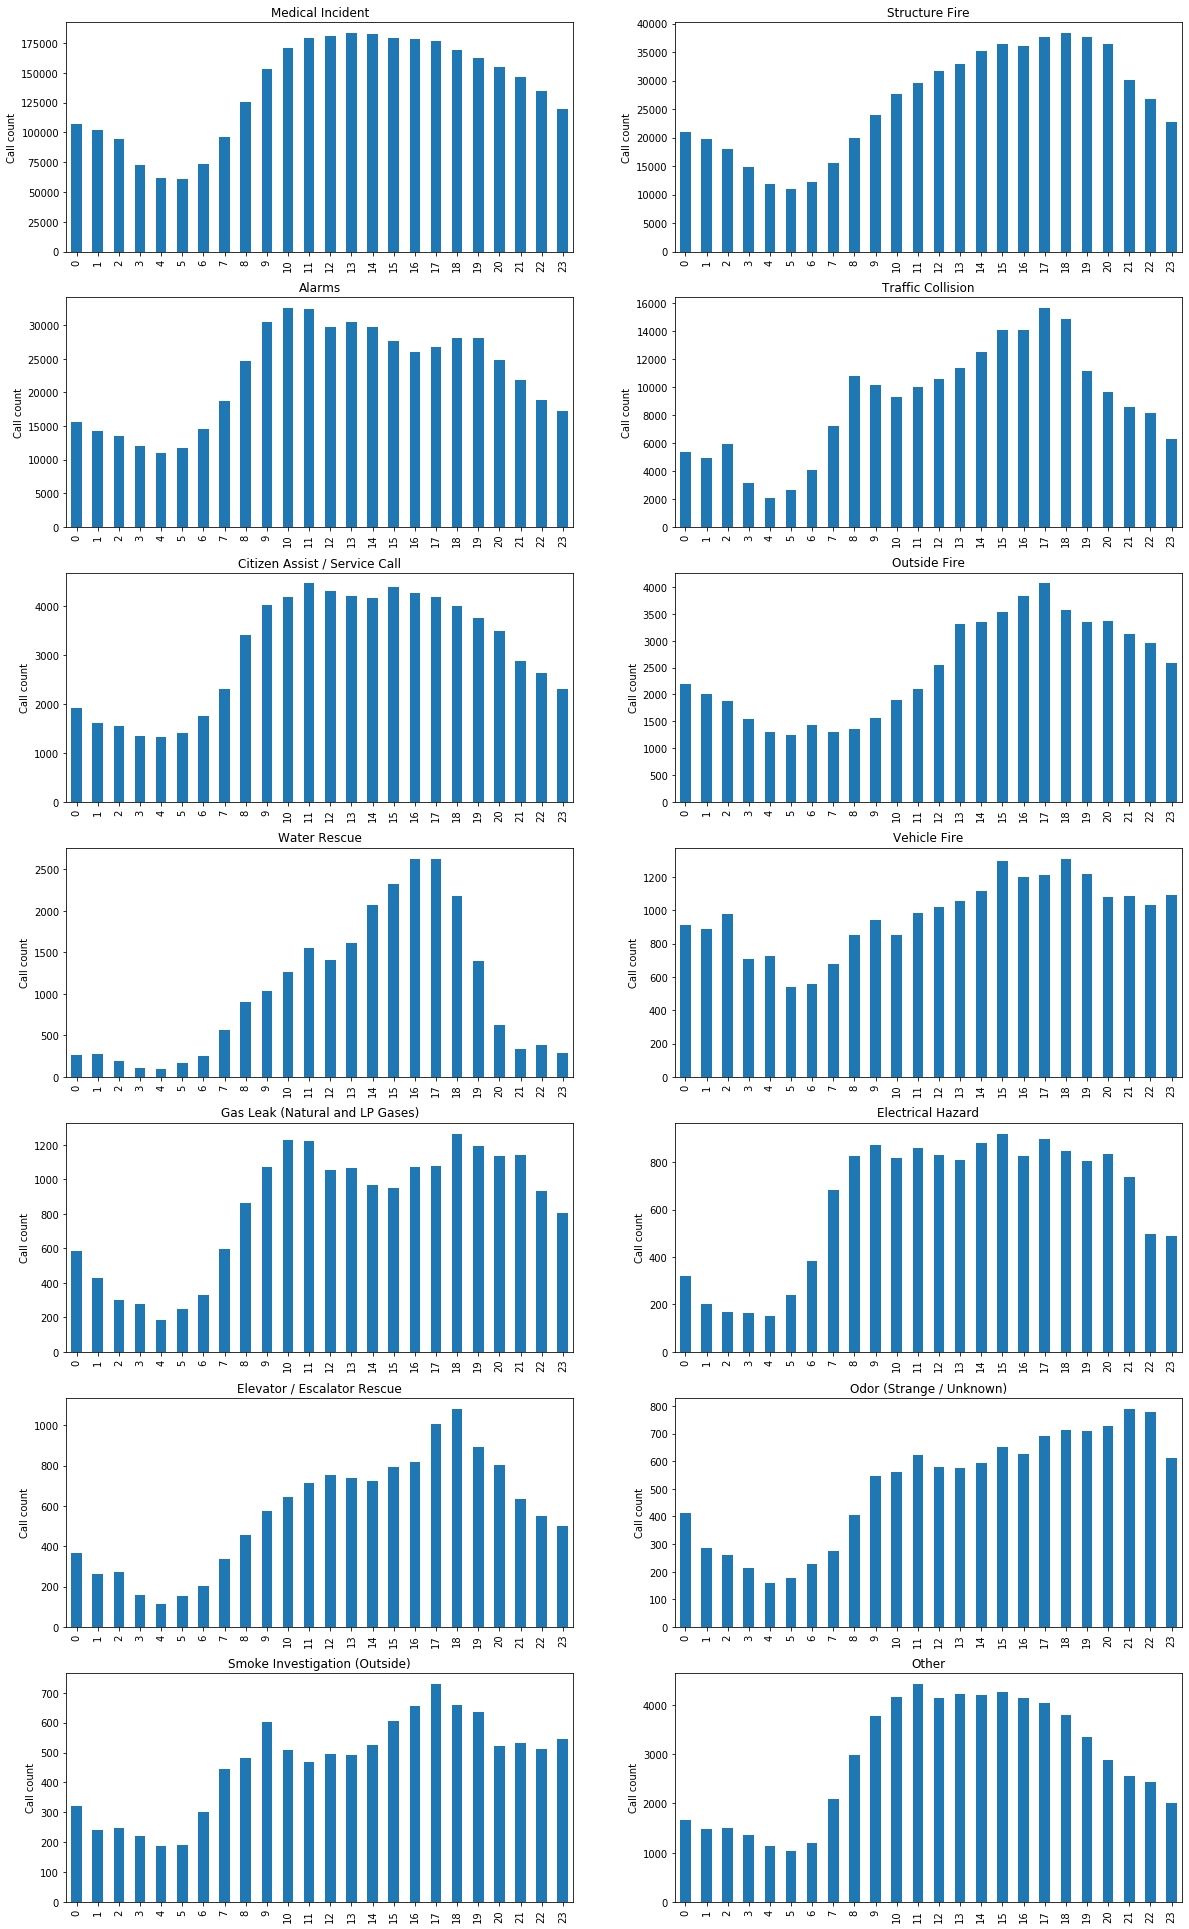

In [22]:
# Hourly patterns
plt.figure(figsize=(20,70))
locs, labels = plt.xticks()

# Make a plot for each focus-crime
for i in range(len(focuscalls)):
    plt.subplot(len(focuscalls),2,i+1)
    tmp = df_fil[df_fil["Call Type"] == focuscalls[i]]
    tmp = tmp.groupby([tmp.index.hour]).size()
    tmp.plot(kind = 'bar')
    plt.title(focuscalls[i])
    plt.xlabel('')
    plt.ylabel('Call count')

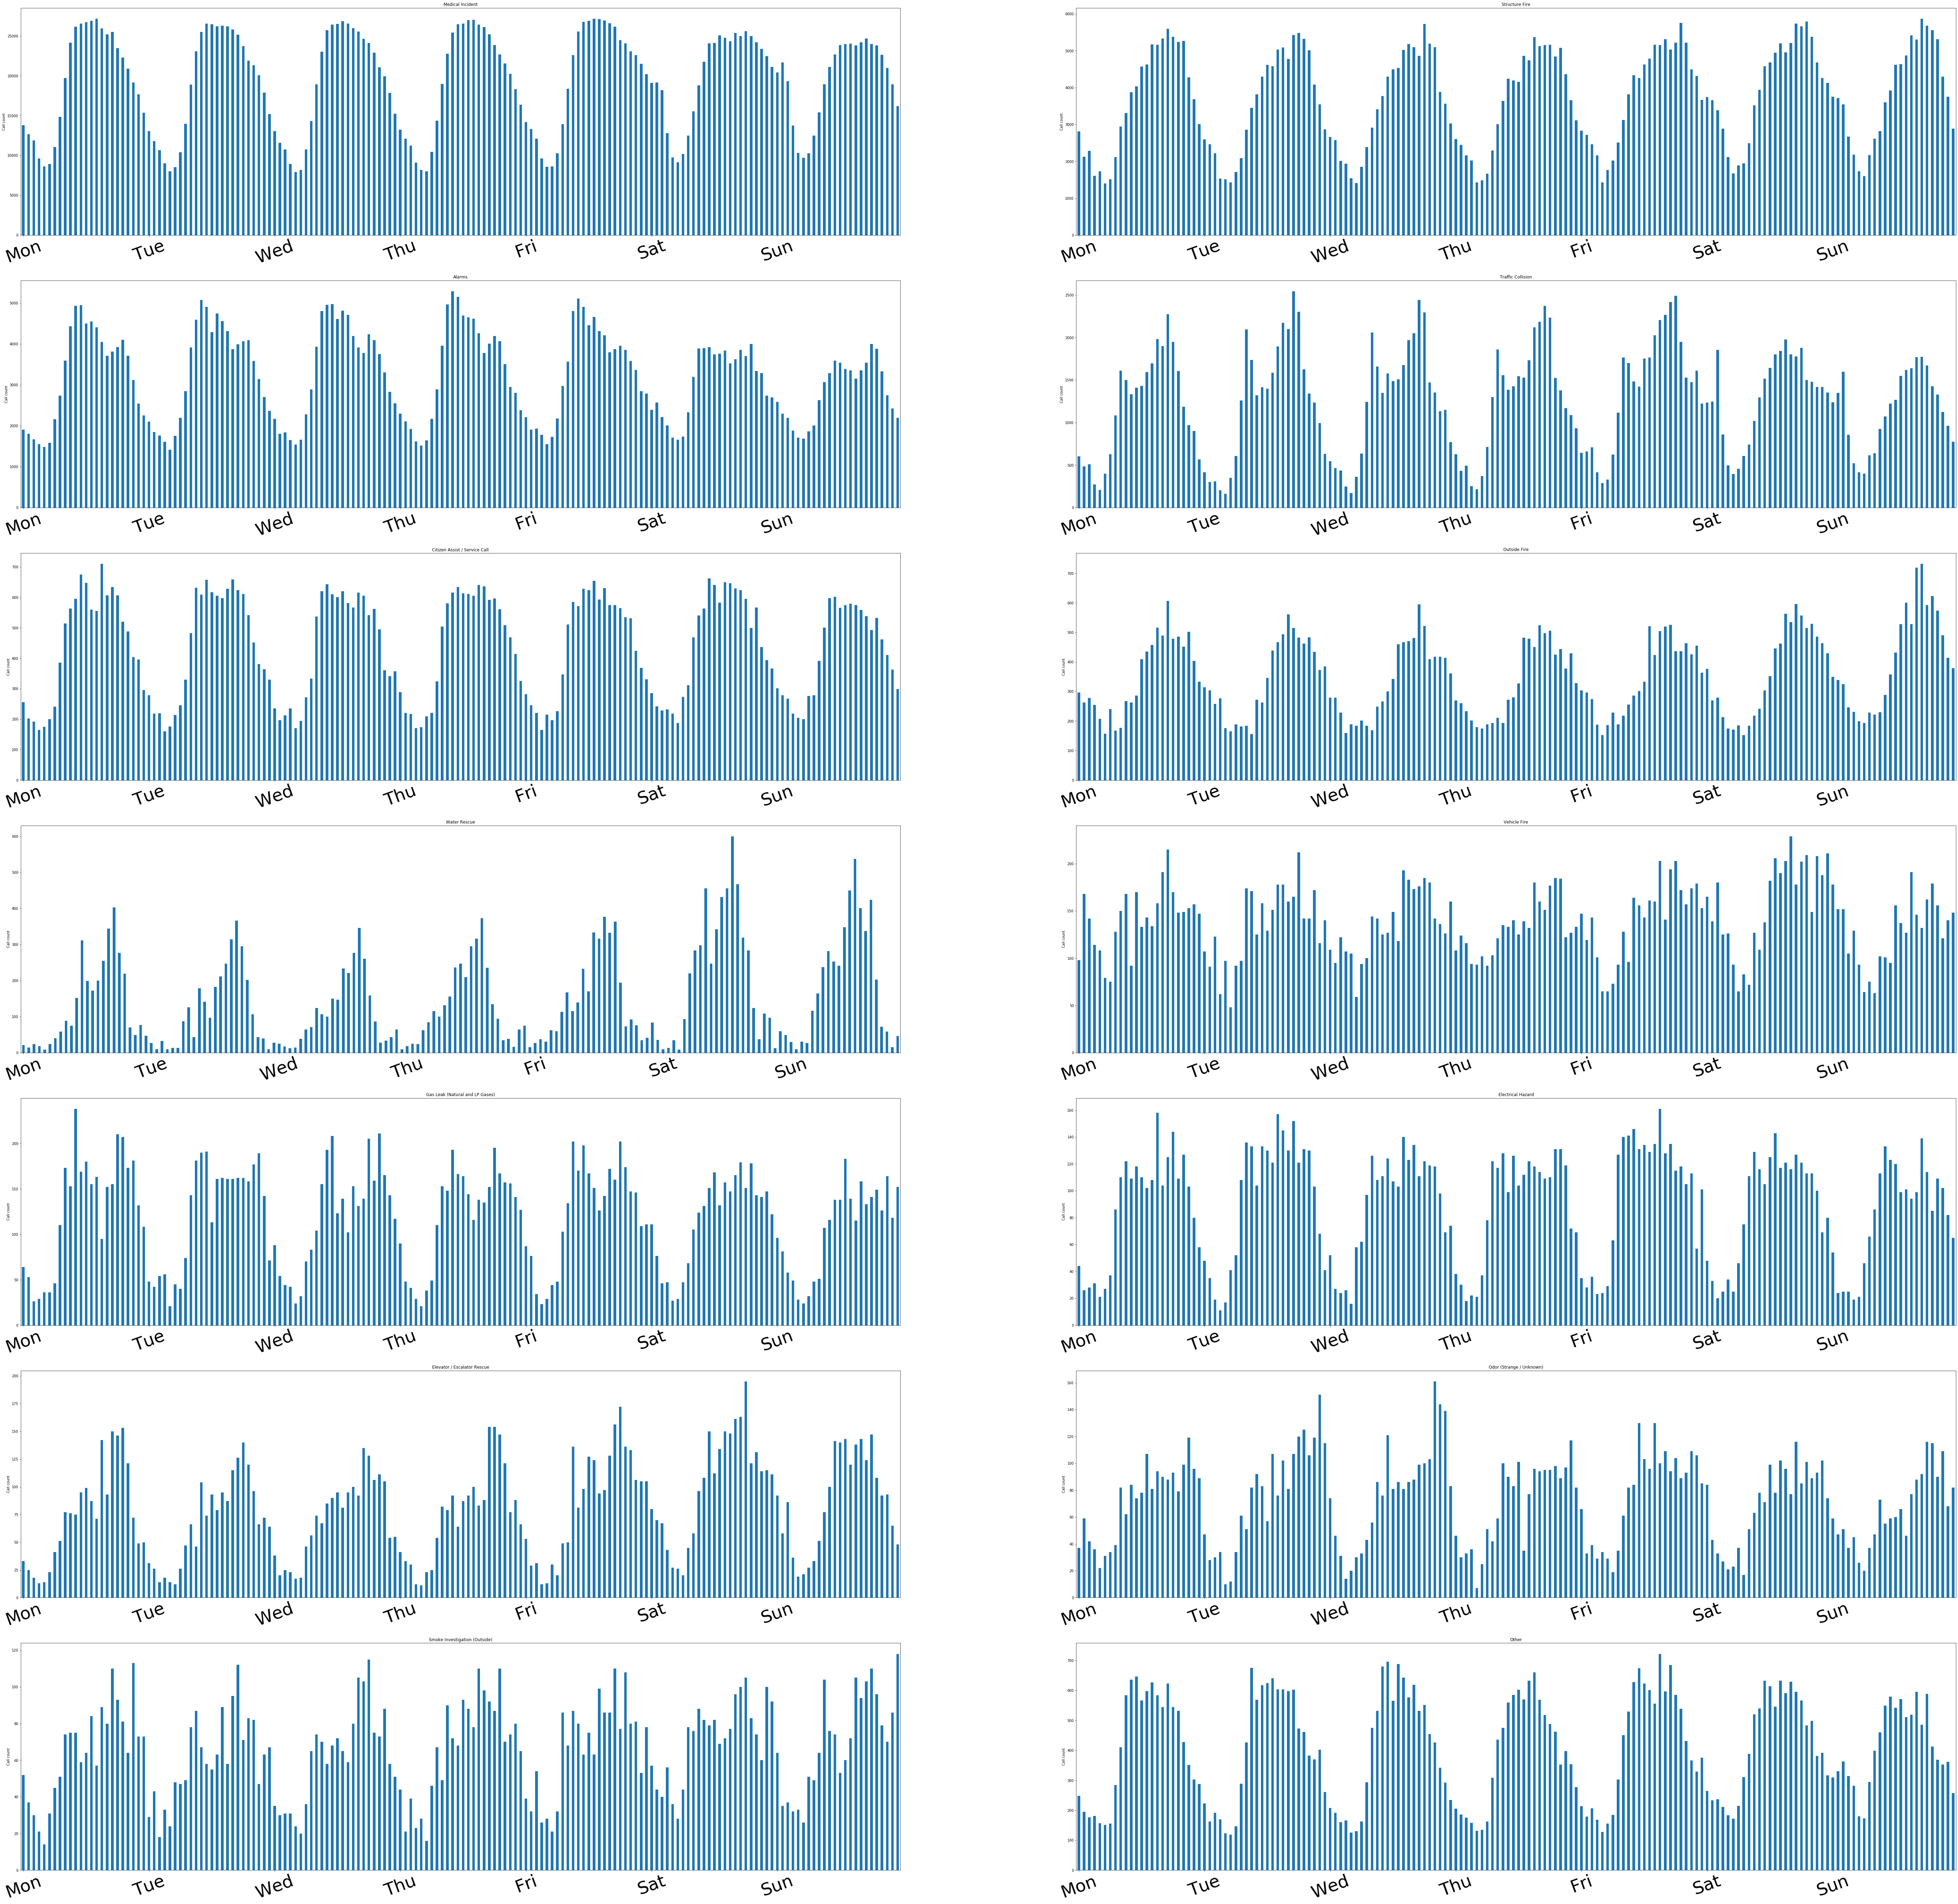

In [25]:
# Hours of the week
plt.figure(figsize=(100,200))
locs, labels = plt.xticks()

# Make a plot for each focus-crime
for i in range(len(focuscalls)):
    plt.subplot(len(focuscalls),2,i+1)
    tmp = df_fil[df_fil["Call Type"] == focuscalls[i]]
    tmp = tmp.groupby([tmp.index.weekday * 24 + (tmp.index.hour + 1)]).size()
    tmp.plot(kind = 'bar')
    plt.title(focuscalls[i])
    plt.xlabel('')
    plt.ylabel('Call count')
    plt.xticks(np.arange(0, 168, 24), ("Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"), rotation = 20, fontsize = 50)

# Correlation between neighborhoods and call types

In [31]:
# Looking at correlations between neighborhood and call type
# Dataframe with neighborhoods and call types
NnC = df_fil[['Neighborhooods - Analysis Boundaries', 'Call Type']]
#Grouping data by nieghborhood and call type
NnCg = NnC.groupby(['Neighborhooods - Analysis Boundaries', 'Call Type'])

In [32]:
#Allocate variables
NC = []
n = list(NnCg.groups.keys())

In [33]:
# Rearrange data and counting
for i,g in enumerate(NnCg.groups,0):
    tmp = NnCg.get_group(g)
    l = list(n[i])
    temp = [l[0],l[1], len(tmp)]
    NC.append(temp)
    
#Making normalized dataframe for heatmap
NCdf = pd.DataFrame(NC)
NCdfp = NCdf.pivot(0,1,2).fillna(value=0)
sumsNC = NCdfp.sum(axis=0)
NC_norm = NCdfp/sumsNC

In [34]:
#Insert column and index names
Neighborhoods = sorted(df_fil['Neighborhooods - Analysis Boundaries'].unique())
NC_norm.columns = sorted(focuscalls)
NC_norm.index = Neighborhoods

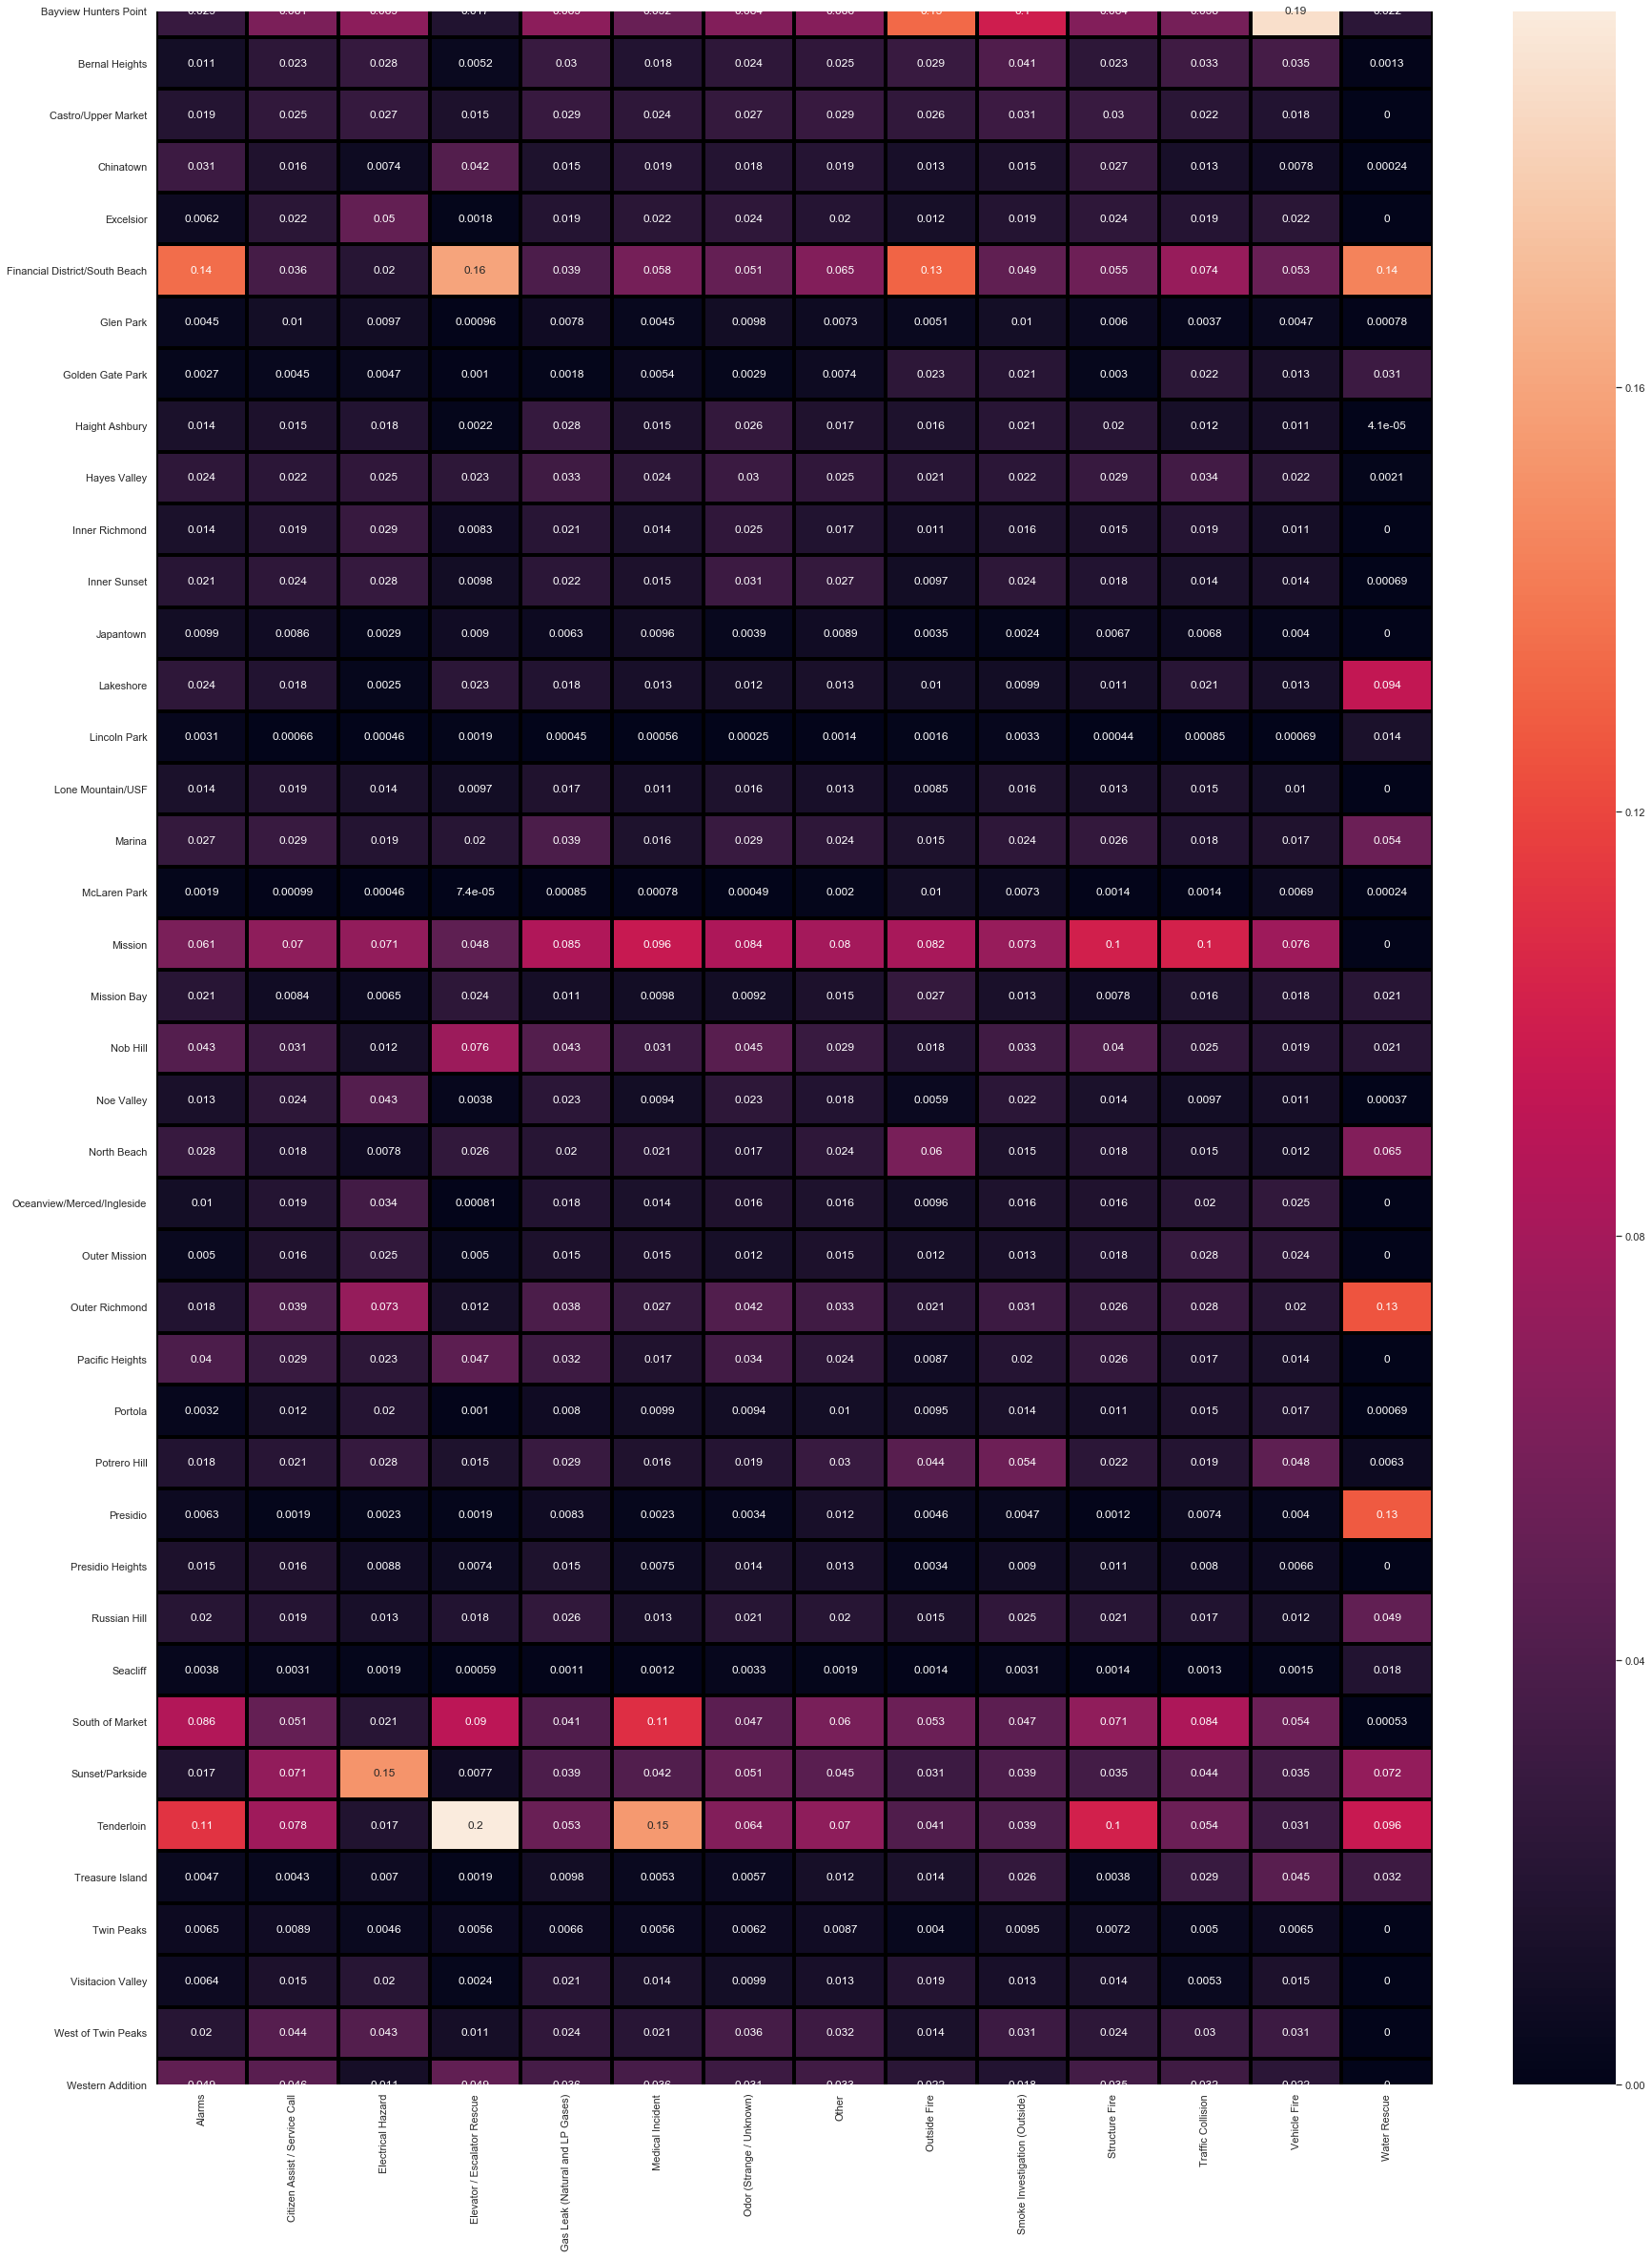

In [38]:
#Heatmap over neighborhoods and call types
sns.set(style="white")
plt.figure(figsize=(30,40))
sns.heatmap(NC_norm, annot = True, linewidths=3, linecolor='black')
plt.show()